In [6]:
import autograd as autograd 
from autograd import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline


# Projet Maths info
## Courbes de niveau 



# Déceler une amorce
**Méthode de Newton à 1D pour des fonctions de 1 variable**
- Soit $f: [0,1]² \to \mathbb{R}$ , considérons $ g:[0,1] \to \mathbb{R} , y \mapsto f(x,y)$ la fonction de une variable.
- Résolvons l'équation $g(y)=c$ sur $[0,1]$ :
    - Pour ce faire utilisons la méthode de Newton qui nous dit, en supposant que la fonction est différentiable et que sa dérivéee ne s'annule pas sur $[0,1]$,  que la suite $(_k)_\mathbb{N}$ définie par $ y_{k+1}=y_{k} -\frac{g(x_k)}{g'(x_{k})}$ est convrgente et de limite y solution de l'équation $g(y)=c$
- On implémente ainsi l'algorithme de résolution d'équation en construisant itérativement la suite.
- On considère la limite atteinte lorsque la distance entre deux $x_k$ successifs est plus petit qu'un certain $\epsilon$ fixé


In [7]:
def find_seed(g,c=0,eps=2**(-26)):
    if (g([0,1])-c)*(g([0,0])-c)<0:
        return None
    else : 
        gradg=autograd.grad(g)
        x_0=5
        x=x_0-(g(np.array([0.,x_0]))-c)/gradg(np.array([0.,x_0]))[1]
        while abs(x-x_0)>eps:
            x_0=x
            x=x_0-(g(np.array([0,x_0]))-c)/gradg(np.array([0,x_0]))[1]
        return [0,x]

In [8]:
g= lambda X : (X[1])**2 +(X[0])**2

In [9]:
find_seed(g,1)

[0, 1.0]

# Tracer de lignes de niveau
## Construction par cheminement

On utlise ici la propriété qui énonce que une certaine ligne de niveau est en tout point perpendiculaire au gradient. On part donc d'une amorce que l'on calcule avec la fonction  <find_seed> et on se déplace d'une distance delta selon la direction perpendiculaire au gradient en ce point. L'erreur s'accumule à chaque itération, mais l'implémentation est relativement aisée.
Cf. $Méthode\space d'Euler$ qui est d'ordre 1 


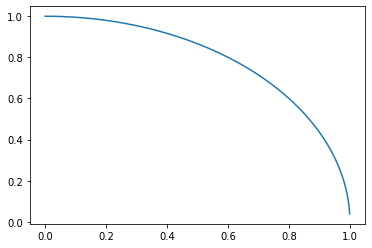

In [15]:
def chemin (g,c=0,delta=0.001):
    abscisses,ordonnées =[],[]
    position=np.array(find_seed(g,c))
    gradg=autograd.grad(g)
    abscisses.append(position[0])
    ordonnées.append(position[1])
    def test (position) :
        return 0<=position[0]<=1 and 0<=position[1]<=1
    
    while test(position) :
        gradX = gradg(position)
        norme = np.sqrt(gradX[1]**2+gradX[0]**2)
        vect = np.array([gradX[1]/norme,-1*gradX[0]/norme])
        position = position + vect*delta
        abscisses.append(position[0])
        ordonnées.append(position[1])
    return abscisses,ordonnées
    
a=chemin(g,1)
plt.plot(a[0],a[1])

        
